# Assignment 4: Permutation test 1
## Learning Outcomes
By completing this assignment, you will be able to implement and use randomization tests to determine whether a specific effect is statistically significant. Randomization tests are a highly universal and powerful way to do this, and form an essential part of the toolkit of any Data Scientist. 

## Problem Description
An increasingly common statistical tool for determining whether a difference is significant is the randomization or permutation test. A randomization test builds - rather than assumes – a sampling distribution of the test statistics. This is achieved by exchanging or permuting variables which are “exchangeable” under the Null-hypothesis. A randomization test gives a simple way to compute the sampling distribution for any test statistic under the null hypothesis that the dependent variable is statistically not dependent on the shuffled variable. 
In this assignment, we continue with the movie dataset from last week. This week your main task is to determine whether the difference in proportion for female vs. male directors to direct action movies is significant. 
You are allowed to use standard numpy and pandas functions such as mean, groupby, shuffle. But you are not allowed to use a permutation functions that have been already been designed. Numeric calculations in python that are printed should be rounded to 6 decimal places. 

Methods that you may find beneficial. 
Pandas: crosstab, iloc. Numpy: random.shuffle, reset_index, matplotlib: hist, axvline 

## Preliminaries 
Import pandas, numpy, matplotlib, and load the dataset file

In [101]:
# importing packages
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.stats as stats

df = pd.read_csv('movieDataset.csv')
df

,Unnamed: 0,boxoff,prodcost,dirIncome,dirGender,year,month,genre,numTheatres
0,0,88.648583,44.742936,1.143234,male,2012,3,comedy,139
1,1,145.334924,38.835516,3.393535,female,2014,11,drama,213
2,2,238.265684,29.532283,2.418883,male,2015,6,other,100
3,3,212.714742,157.111899,2.034115,male,2014,10,adventure,436
4,4,120.175461,30.547155,0.963219,female,2012,1,comedy,115
5,5,257.890838,115.753066,0.819046,female,2012,10,adventure,596
6,6,109.653453,13.209667,1.880167,male,2015,8,drama,193
7,7,79.710209,43.221009,0.440033,male,2013,1,drama,96
8,8,250.156099,32.668137,2.738503,male,2012,8,action,514
9,9,225.857138,183.499948,1.596353,male,2012,12,action,360


## TASK 1: Defining the test statistics (40pts)
### Question 1 - Create contingency table of adventure (yes/no) by director gender (10pts)
Generate a cross-tabulation table of the 2x2 proportions of directorGender vs. whether the movie is an adventure or not (all other genres should be combined into non-adventure movies).

In [5]:
ct = pd.crosstab(df['genre'] == 'adventure', df['dirGender'], margins=1)
display(ct)

dirGender,female,male,All
genre,,,
False,31,155,186
True,6,58,64
All,37,213,250


### Question 2 - Calculate p(adventure|female)-p(adventure|male) (20pts)
Calculate the probability that the movie is an adventure given that the director Gender is female, p(adventure|female), the probability of the movie is an adventure given that the director Gender is male, p(adventure|male), as well as the difference between these two numbers, p(adventure|female)- p(adventure|male) (for help, see solution to homework 2).

In [21]:
#padv_f = (ct['female'][True]/ct['All']['All']) / (ct['female']['All']/ct['All']['All'])
padv_f = (ct['female'][True]/ct['female']['All'])
print(f'Probability that the movie is an adventure given that the director is female: {padv_f:.6f}')
#padv_m = (ct['male'][True] / ct['All']['All']) / (ct['male']['All']/ct['All']['All'])
padv_m = (ct['male'][True]/ct['male']['All'])
print(f'Probability that the movie is an adventure given that the director is male: {padv_m:.6f}')

padv_diff = padv_f - padv_m
print(f'\nDifference of probabilities: {padv_diff:.6f}')

Probability that the movie is an adventure given that the director is female: 0.162162
Probability that the movie is an adventure given that the director is male: 0.272300

Difference of probabilities: -0.110138


### Question 3 - Define a function that calculates the difference in average income by gender (10pts)
Write a function (e.g., https://www.tutorialspoint.com/python/python_functions.htm) that takes the data frame as an input and returns the difference between the average income of male directors in adventure and the average income of female directors in adventure.

In [93]:
def avg_income_diff(data, genre='adventure'):
    """
    Args:
        data (pd.dataframe) - input dataset
        genre (str) - movie genre to select
        
    Returns:
        diff (float) - difference between avg incomes
    """
    dat = data[data['genre']==genre]
    income_by_gender = dat['dirIncome'].groupby(dat['dirGender'])
    income_m = income_by_gender.get_group('male')
    income_f = income_by_gender.get_group('female')
    diff = income_m.mean() - income_f.mean()
    return diff

diff = avg_income_diff(df, genre='adventure')
print(f'The average income difference is: {diff:.6f}')
diff = avg_income_diff(df, genre='action')
print(f'The average income difference is: {diff:.6f}')

The average income difference is: 0.212741
The average income difference is: 0.810571


## Task 2: Perform a permutation test (60pts)
### Question 1 (10pts)
Written answer: We want to test the hypothesis that female directors of adventure movies earn less, on average, than male directors of adventure movies. What is the Null-hypothesis we need to consider? 

The null hypothesis is that the incomes are equal (the difference zero) or that female directors earn more on average than male directors.

### Question 2 (40pts)
Perform a permutation test. Under the Null-hypothesis the director gender is exchangeable. Write a function that takes the data frame as an input and then randomly permutes the directorGender column. For each iteration, the function then calls the function written for Task1, Q3 to get the test statistic. Each iteration, the test statistic should  be stored in a list. It is important to mention that the gender must be randomly assigned each time prior to calculating the difference of the conditional probabilities. 

After bulding up the numpy array of test statistics, the function should plot a histogram of the test statistics and mark the value of the empirical test statistics by a vertical line (see https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvline.html). Finally, it should report the p-value. 

For Pseudo code see lecture. Start with 500 iterations to test your code – for the final result, use 5000 iterations.

The empirical difference in avg incomes is: 0.212741
The p-value of the test statistic is: 0.369000


/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


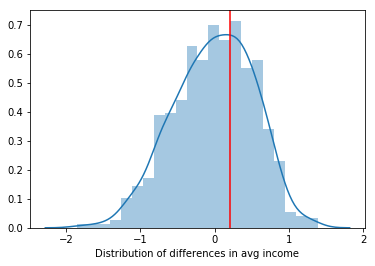

In [125]:
def perm_test(data, n_iter=500, genre='adventure', var='dirGender'):
    """
    Args:
        data (pd.dataframe) - input dataset
        n_iter (int) - number of iterations
        genre (str) - movie genre to select
        var (str) - column to permute
        
    Returns:
        stat (np.ndarray) - array of test statistics
        p_val (float) - p-value of the test statistic
    """
    # initialize stat array
    stat = np.zeros([n_iter])
        
    ## 1. create a copy of the data
    d = data.copy()
    d = d[d['genre']==genre].reset_index(drop=1)
    #display(d)
    
    ## 2. create an array that represent the indices
    idx = np.arange(len(d.index))

    for i in range(n_iter):
        
        ## 3. randomly shuffle indices
        np.random.shuffle(idx)
        
        ## 4. shuffle the selected variable
        shuff_var = d[var].iloc[idx]
        
        ## 5. reorder the shuffled indices
        shuff_var = shuff_var.reset_index(drop=1)
        
        ## 6. put the shuffled gender variable back in
        d[var] = shuff_var
        #display(d)
        
        ## 7. calculate test statistic
        stat[i] = avg_income_diff(d, genre='adventure')
    
    ## 8. plot the histogram of results
    sns.distplot(stat) 
    plt.xlabel('Distribution of differences in avg income')
    
    # 9. calculate and mark the value of the empirical test statistics
    diff = avg_income_diff(data, genre='adventure')
    print(f'The empirical difference in avg incomes is: {diff:.6f}')
    plt.axvline(diff, color = 'red', alpha = 1, lw = 1.5)
    
    ## 10. calculate the p-value
    H1 = stat > diff
    N = sum(H1)
    p_val = N/len(stat)        
    
    return stat, p_val

stat, p_val = perm_test(df, n_iter=1000)
print(f'The p-value of the test statistic is: {p_val:.6f}')

### Question 3 (10pts)
Written response: What do you conclude from this result?


That the difference is not significant (no rejection of null hypothesis)